영상을 입력해서 다중클래스를 분류할 수 있는 모델들에 대해서 알아보겠습니다. 숫자 손글씨 데이터셋인 MNIST을 이용하여 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성하고 학습 시켜보겠습니다. 이 모델들은 아래 문제들에 활용 기대해봅니다.
* 동양인 얼굴 사진으로 한국인, 일본인, 중국인 구분
* 현미경 촬영 영상으로부터 다양한 균 구분
* 스마트폰으로 찍은 식물 종류 구분
* 기상위성영상으로부터 태풍 타입 분류

---
### 데이터셋 준비

케라스 함수에서 제공하는 숫자 손글씨 데이터셋인 MNIST을 이용하겠습니다. 초기 라벨값은 0에서 9까지 정수로 지정되어 있습니다. 데이터 정규화를 위해서 255.0으로 나누었습니다. 아래는 다층퍼셉트론 신경망 모델에 입력하기 위해 데이터셋 생성하는 코드입니다.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

아래는 컨볼루션 신경망 모델에 입력하기 위해 데이터셋 생성하는 코드입니다. 샘플수, 너비, 높이, 채널수로 총 4차원 배열로 구성합니다.

In [ ]:
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

불러온 훈련셋을 다시 훈련셋 50,000개와 검증셋 10,000개로 나누었습니다.

In [ ]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

다중클래스분류 모델의 출력과 맞추기 위해서 0에서 9까지의 값이 저장된 라벨에 'one-hot 인코딩' 처리를 수행합니다.

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

만든 데이터셋 일부를 가시화 해보겠습니다.

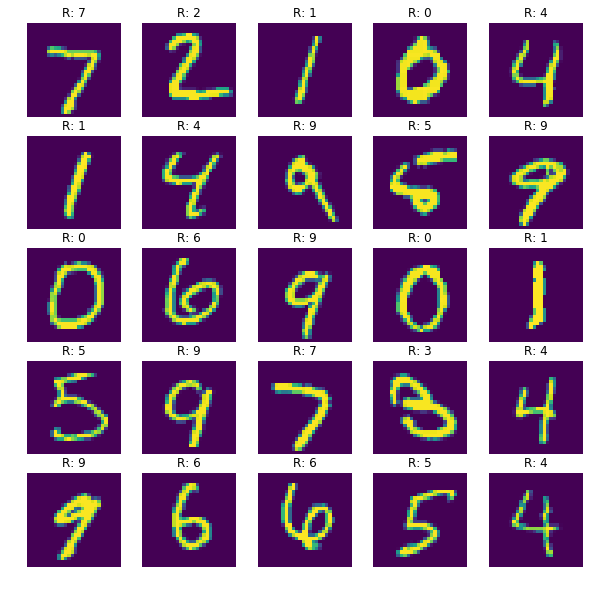

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):

    sub_plt = axarr[i/plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i]))
    sub_plt.set_title(sub_plt_title)

plt.show()

![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_11_0.png)

---
### 레이어 준비

본 장에서 새롭게 소개되는 블록은 없습니다. 앞서 살펴본 블록들로 구성해보겠습니다. 

---
### 모델 준비

영상을 입력하여 다중클래스분류를 하기 위해 `다층퍼셉트론 신경망 모델`, `컨볼루션 신경망 모델`, `깊은 컨볼루션 신경망 모델`을 준비했습니다.

#### 다층퍼셉트론 신경망 모델

    model = Sequential()
    model.add(Dense(256, input_dim=width*height, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_0m.png)

#### 컨볼루션 신경망 모델

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_1m.png)

#### 깊은 컨볼루션 신경망 모델

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_2m.png)

---
### 전체 소스

앞서 살펴본 `다층퍼셉트론 신경망 모델`, `컨볼루션 신경망 모델`, `깊은 컨볼루션 신경망 모델`의 전체 소스는 다음과 같습니다. 

#### 다중퍼셉트론 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 5s - loss: 0.6887 - acc: 0.8239 - val_loss: 0.2998 - val_acc: 0.9135
Epoch 2/30
50000/50000 [==============================] - 4s - loss: 0.2885 - acc: 0.9166 - val_loss: 0.2363 - val_acc: 0.9299
Epoch 3/30
50000/50000 [==============================] - 5s - loss: 0.2297 - acc: 0.9337 - val_loss: 0.1961 - val_acc: 0.9434
Epoch 4/30
50000/50000 [==============================] - 5s - loss: 0.1913 - acc: 0.9451 - val_loss: 0.1745 - val_acc: 0.9502
Epoch 5/30
50000/50000 [==============================] - 5s - loss: 0.1631 - acc: 0.9531 - val_loss: 0.1490 - val_acc: 0.9574
Epoch 6/30
50000/50000 [==============================] - 5s - loss: 0.1413 - acc: 0.9591 - val_loss: 0.1396 - val_acc: 0.9607
Epoch 7/30
50000/50000 [==============================] - 5s - loss: 0.1237 - acc: 0.9642 - val_loss: 0.1305 - val_acc: 0.9632
Epoch 8/30
50000/50000 [==============================] - 5s 

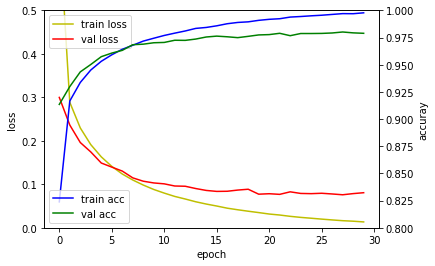

 8864/10000 [=========================>....] - ETA: 0s## evaluation loss and_metrics ##
[0.080654500093613746, 0.97560000000000002]


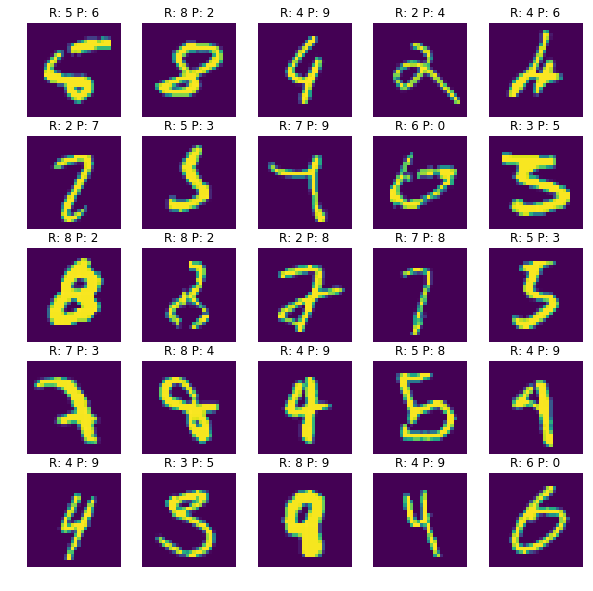

In [9]:
# 0. 사용할 패키지 불러오기
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()

시험셋을 입력하여 예측한 결과와 실제 결과가 차이나는 데이터만 표시해봤습니다. 분류하기 애매한 데이터도 많지만 모델이 잘못 예측한 경우도 많아 보입니다.

![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_17_3.png)

#### 컨볼루션 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 43s - loss: 0.6064 - acc: 0.8323 - val_loss: 0.2432 - val_acc: 0.9271
Epoch 2/30
50000/50000 [==============================] - 30s - loss: 0.1653 - acc: 0.9489 - val_loss: 0.1182 - val_acc: 0.9676
Epoch 3/30
50000/50000 [==============================] - 22s - loss: 0.1136 - acc: 0.9647 - val_loss: 0.1512 - val_acc: 0.9513
Epoch 4/30
50000/50000 [==============================] - 22s - loss: 0.0915 - acc: 0.9719 - val_loss: 0.0889 - val_acc: 0.9750
Epoch 5/30
50000/50000 [==============================] - 24s - loss: 0.0773 - acc: 0.9756 - val_loss: 0.0808 - val_acc: 0.9767
Epoch 6/30
50000/50000 [==============================] - 25s - loss: 0.0678 - acc: 0.9793 - val_loss: 0.0732 - val_acc: 0.9788
Epoch 7/30
50000/50000 [==============================] - 23s - loss: 0.0600 - acc: 0.9813 - val_loss: 0.0706 - val_acc: 0.9810
Epoch 8/30
50000/50000 [==============================

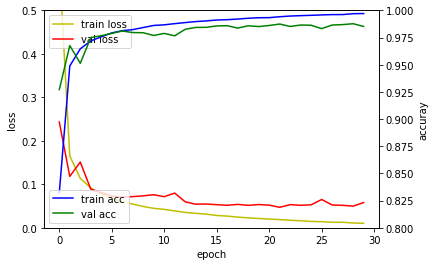

 9728/10000 [============================>.] - ETA: 0s## evaluation loss and_metrics ##
[0.044951398478045301, 0.98529999999999995]


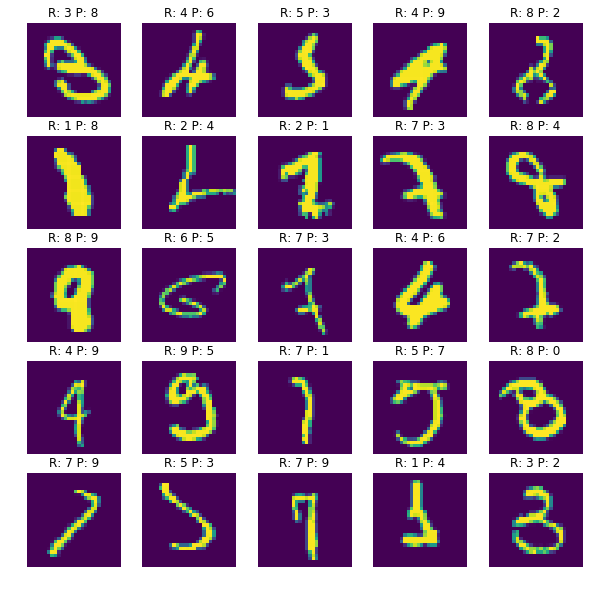

In [11]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()

시험셋을 입력하여 예측한 결과와 실제 결과가 차이나는 데이터만 표시해봤습니다. 점점 분류하기 애매한 데이터가 많이 보입니다.

![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_20_3.png)

#### 깊은 컨볼루션 신경망 모델

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 93s - loss: 0.9137 - acc: 0.6890 - val_loss: 0.1426 - val_acc: 0.9591
Epoch 2/30
50000/50000 [==============================] - 95s - loss: 0.2261 - acc: 0.9300 - val_loss: 0.0948 - val_acc: 0.9718
Epoch 3/30
50000/50000 [==============================] - 93s - loss: 0.1676 - acc: 0.9484 - val_loss: 0.0755 - val_acc: 0.9772
Epoch 4/30
50000/50000 [==============================] - 95s - loss: 0.1382 - acc: 0.9572 - val_loss: 0.0646 - val_acc: 0.9810
Epoch 5/30
50000/50000 [==============================] - 100s - loss: 0.1182 - acc: 0.9628 - val_loss: 0.0596 - val_acc: 0.9824
Epoch 6/30
50000/50000 [==============================] - 95s - loss: 0.1064 - acc: 0.9669 - val_loss: 0.0511 - val_acc: 0.9841
Epoch 7/30
50000/50000 [==============================] - 94s - loss: 0.0952 - acc: 0.9700 - val_loss: 0.0491 - val_acc: 0.9852
Epoch 8/30
50000/50000 [=============================

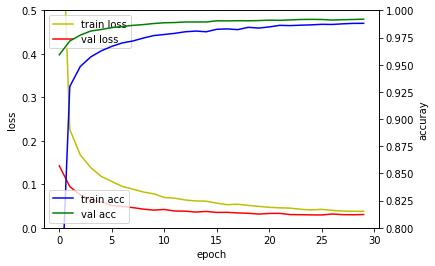

 9920/10000 [============================>.] - ETA: 0s## evaluation loss and_metrics ##
[0.022249554305176208, 0.99260000000000004]


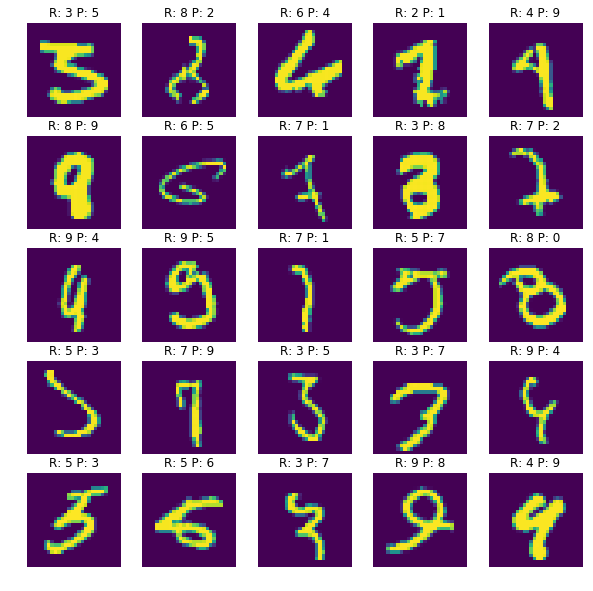

In [12]:
# 0. 사용할 패키지 불러오기
import numpy as np

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dropout

width = 28
height = 28

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([0.8, 1.0])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i = 0

while cnt < (plt_row*plt_col):
    
    if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
        i += 1
        continue
    
    sub_plt = axarr[cnt/plt_row, cnt%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
    sub_plt.set_title(sub_plt_title)

    i += 1    
    cnt += 1

plt.show()

시험셋으로 예측한 결과 일부를 비교해봤습니다. 사람이 봐도 애매한 데이터가 많이 보입니다. 

![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_23_3.png)

---

### 학습결과 비교

다층퍼셉트론 신경망 모델은 훈련정확도는 검증 손실값은 높아지고 있어 과적합이 발생하였습니다. 컨볼루션 신경망 모델은 다층퍼셉트론 신경망 모델에 비해 높은 성능을 보이고 있습니다. 깊은 컨볼루션 신경망 모델은 드랍아웃(Dropout) 레이어 덕분에 과적합이 발생하지 않고 검증 손실값이 지속적으로 떨어지고 있음을 확인할 수 있습니다.

|다층퍼셉트론 신경망 모델|컨볼루션 신경망 모델|깊은 컨볼루션 신경망 모델|
|:-:|:-:|:-:|
|![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_17_1.png)|![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_20_1.png)|![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_23_1.png)

---

### 요약

영상를 입력하여 다중클래스분류하는 다층퍼셉트론 신경망 모델, 컨볼루션 신경망 모델, 깊은 컨볼루션 신경망 모델을 살펴보고 그 성능을 확인 해봤습니다.

![img](http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_title.png)

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/lecture/)
* 이전 : [영상입력 이진분류 모델 레시피](https://tykimos.github.io/Keras/2017/08/18/Image_Input_Binary_Classification_Model_Recipe/)
* 다음 : [시계열수치입력 수치예측 모델 레시피](https://tykimos.github.io/Keras/2017/08/17/Time-series_Numerical_Input_Numerical_Prediction_Model_Recipe)